In [8]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib as plt 
import seaborn as sns 
import plotly.express as px 
import datetime as dt 
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 6.4 MB/s eta 0:00:00


In [10]:
cwd = os.getcwd()

In [13]:
df = pd.read_csv(cwd+'/Prepped_Reviews.csv', index_col = 0)
df = df.reset_index(drop=True)

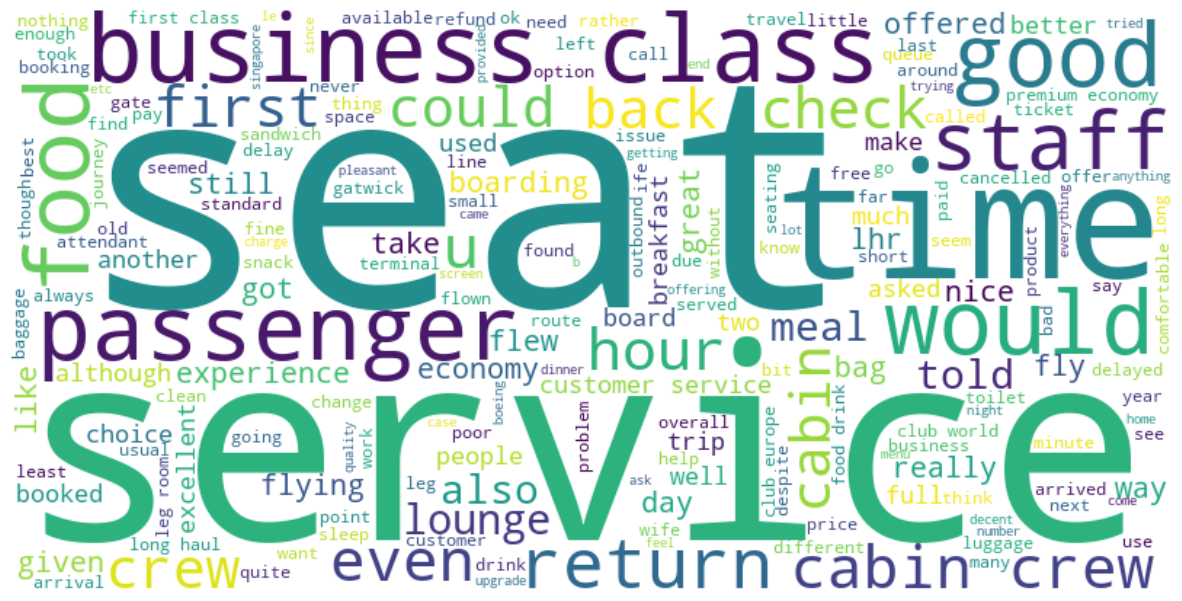

In [51]:
#most freq words in review 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#remove stopwords that dont identify sentiment 
stopwords = set(stopwords.words('english'))
stopwords.update([
    'ba', 'flight', 'british airway', 'airline', 'plane', 'verified', 'review', 'went', 'aircraft','heathrow', 'british', 'airway', 'one', 'get', 'however', 'made',  'put', 'said', 'london', 'new', 'york', 'jfk', 'via', 'airport', 'sydney', 'san','fransisco', 'rio',
])


wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(reviews)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [44]:
words = corpus.split(' ')
new_words = [word for word in words if word not in stopwords]

<Axes: >

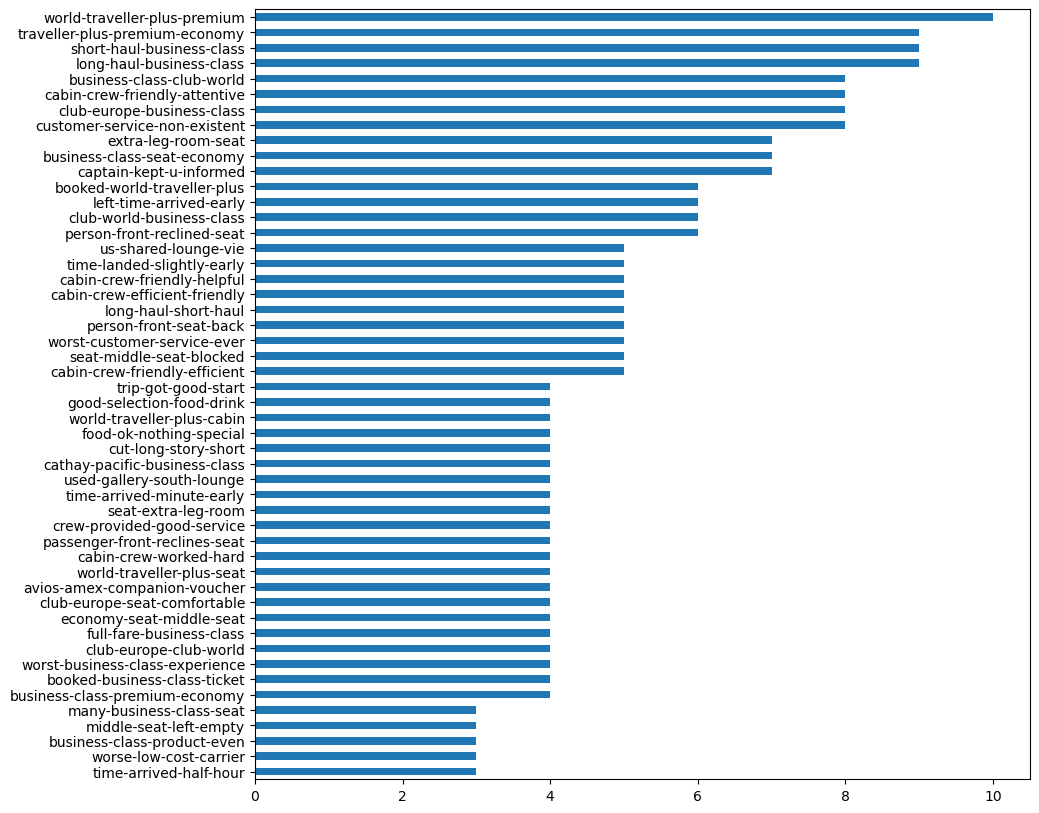

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams
from nltk.util import ngrams

def get_freq(filtered_words, num_ngrams):
    #bigrams 
    n_grams = ngrams(filtered_words, num_ngrams)
    
    # Frequency distribution
    ngram_fd = FreqDist(n_grams).most_common(50)
    
    #sort by higherst. 
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key = lambda item:item[1])} 
    
    #join bigram 
    n_gram_join = {'-'.join(k):v for k,v in sorted(ngram_fd, key = lambda item:item[1])}
    
    # Convert to pandas DataFrame for plotting
    ngram_freq_plot = pd.Series(n_gram_join)
    plt.figure(figsize=(10,10))
    ax = ngram_freq_plot.plot(kind='barh')
    return ax

get_freq(new_words, 4)


In [66]:
# Ratings 1-3
Ratings1_3 = df['Star Rating'].isin(['1.0', '2.0', '3.0'])

# Ratings 4-6
Ratings4_6 = df['Star Rating'].isin(['4.0', '5.0', '6.0'])

# Ratings 7-10
Ratings7_10 = df['Star Rating'].isin(['7.0', '8.0', '9.0', '10.0'])

In [71]:
# Ratings 1-3
Ratings1_3 = df[df['Star Rating'].astype(float).between(1, 3)]

# Ratings 4-6
Ratings4_6 = df[df['Star Rating'].astype(float).between(4, 6)]

# Ratings 7-10
Ratings7_10 = df[df['Star Rating'].astype(float).between(7, 10)]


In [75]:
Reviews1_3 = ' '.join(Ratings1_3.Corpus) 
Reviews4_6 = ' '.join(Ratings4_6.Corpus) 
Reviews7_10 = ' '.join(Ratings7_10.Corpus) 

#split text of all reviews into a list of words
words1_3 = Reviews1_3.split(' ') 
words4_6 = Reviews4_6.split(' ') 
words7_10 = Reviews7_10.split(' ') 

<Axes: >

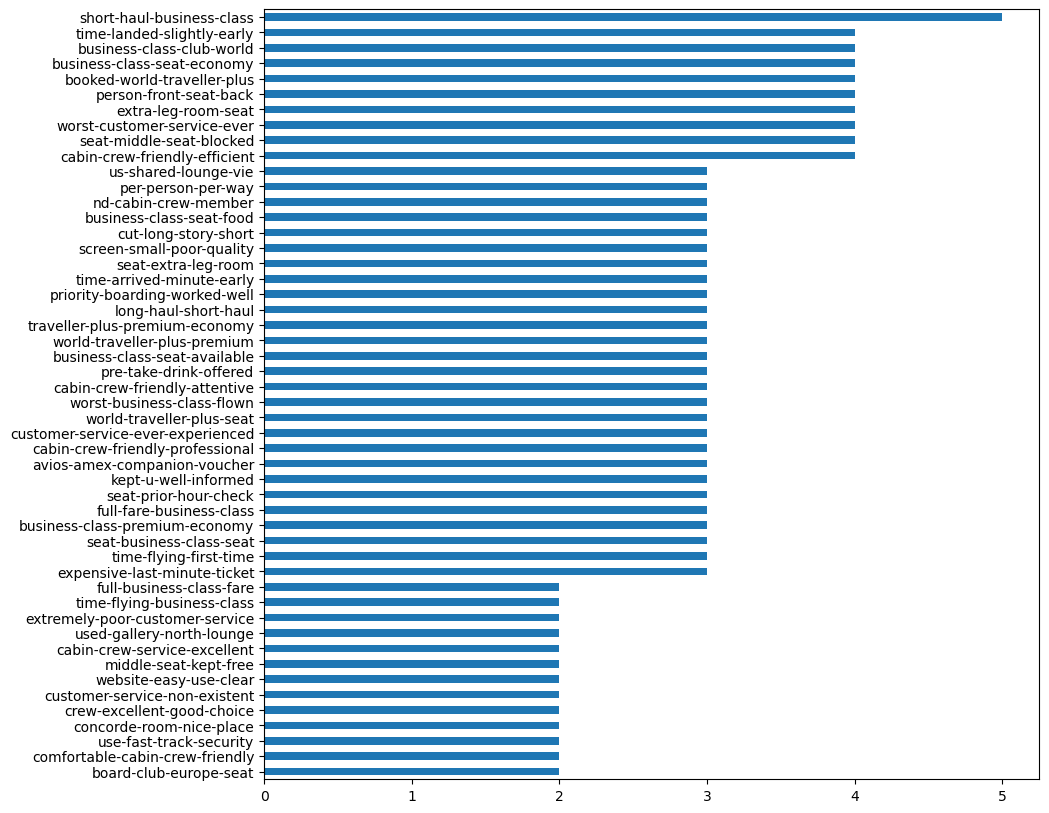

In [76]:
test_word1_3 = [word for word in words1_3 if word not in stopwords] 
get_freq(test_word1_3,4) 

<Axes: >

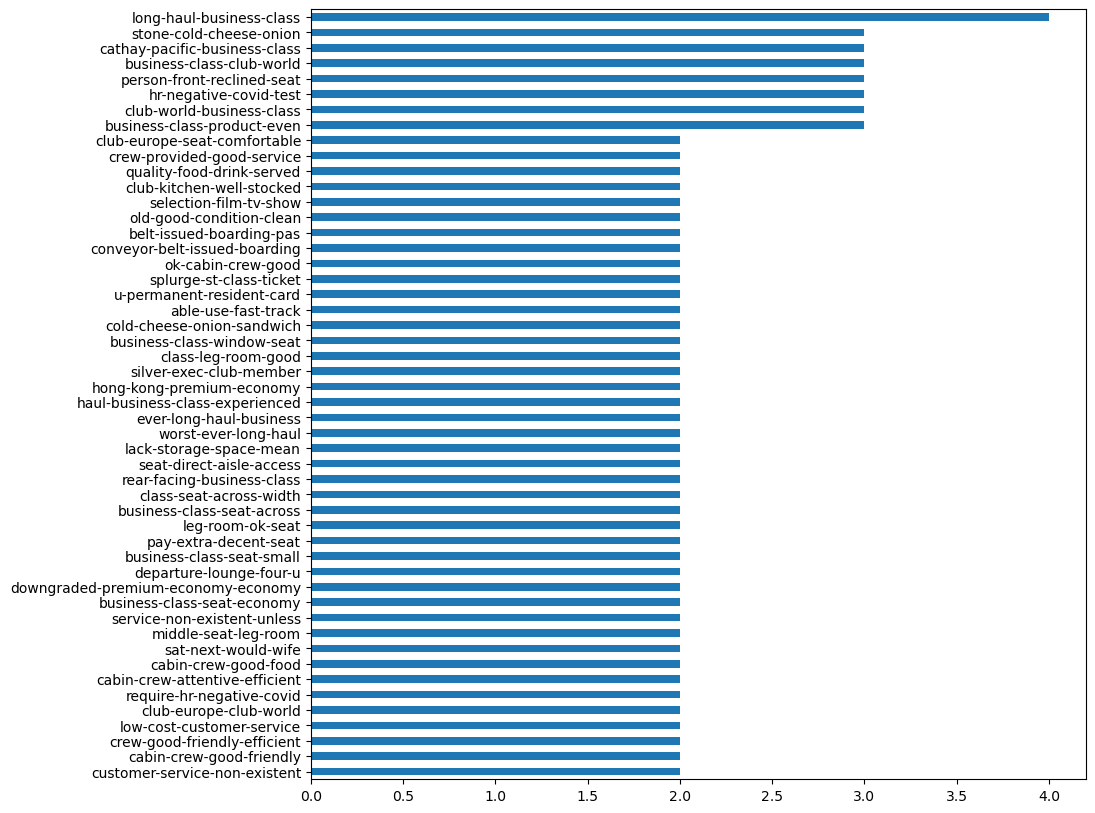

In [77]:
test_word4_6 = [word for word in words4_6 if word not in stopwords] 
get_freq(test_word4_6,4) 

<Axes: >

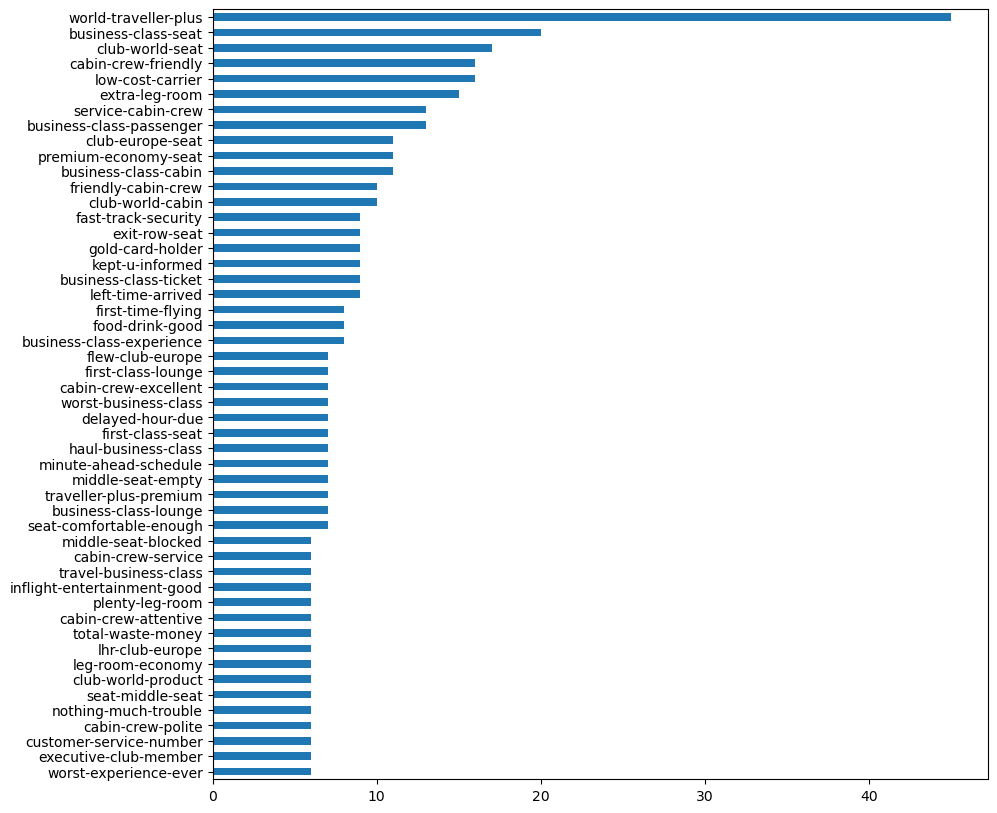

In [80]:
test_word7_10 = [word for word in words7_10 if word not in stopwords] 
get_freq(test_word7_10,3) 

In [ ]:
#PRESENTATION INFO 
##number of countries that reviews 
##total reviews 
##AVG overall rating 
##what customers like/dislike 
##total count for each rating 
##reviews by country 
##ratings overtime 
##customer recommendations
 

In [102]:
#number of countries that reviews unique_countries = df['Country'].dropna().unique()
unique_countries
#len(unique_countries)


array(['United States', 'China', 'United Kingdom', 'Canada', 'Australia',
       'Ecuador', 'Switzerland', 'Germany', 'Ireland', 'Romania', 'Italy',
       'Netherlands', 'France', 'South Africa', 'Kuwait', 'Iceland',
       'Denmark', 'Poland', 'Hong Kong', 'Qatar', 'Spain', 'Greece',
       'Senegal', 'United Arab Emirates', 'Cyprus', 'Chile', 'Sweden',
       'Austria', 'India', 'Belgium', 'New Zealand', 'Czech Republic',
       'Malaysia', 'Singapore', 'Ghana', 'Bermuda', 'Botswana', 'Brazil',
       'Panama', 'Nigeria', 'Russian Federation', 'Philippines',
       'Bulgaria', 'Thailand', 'Argentina', 'Mexico',
       'Saint Kitts and Nevis', 'Vietnam', 'Norway', 'Jordan', 'Japan',
       'Taiwan', 'Slovakia', 'Israel', 'South Korea', 'Saudi Arabia',
       'Hungary', 'Portugal', 'Cayman Islands', 'Costa Rica', 'Egypt',
       'Laos', 'Turkey', 'Indonesia', 'Bahrain', 'Dominican Republic',
       'Luxembourg', 'Finland', 'Ukraine', 'Trinidad & Tobago'],
      dtype=object)

In [93]:
##total reviews v
len(df['Corpus'])

3500

In [95]:
##AVG overall rating 
df['Star Rating'].mean()

4.635687732342007

In [ ]:
##what customers like/dislike 


In [103]:
# Assuming df is your DataFrame
country_counts = df['Country'].value_counts()

# If you want to include NaN values in the count
# country_counts = df['Country'].value_counts(dropna=False)

print(country_counts)


Country
United Kingdom           2183
United States             404
Australia                 144
Canada                    108
Germany                    62
                         ... 
Costa Rica                  1
Cayman Islands              1
Panama                      1
Saint Kitts and Nevis       1
Trinidad & Tobago           1
Name: count, Length: 70, dtype: int64
